In [2]:
##importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

In [3]:
##loading the data
data = pd.read_csv('Salary_Data.csv')

In [3]:
## overview odf the data
print(data.head(10))


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [92]:
data.shape

(30, 2)

In [4]:
## copying the data from actual data
df = data.copy()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

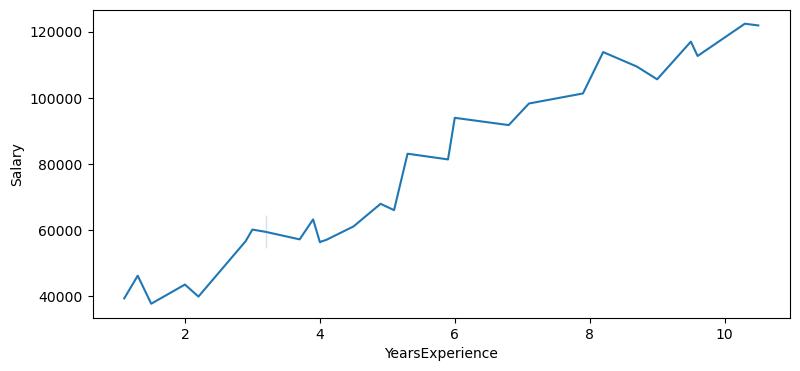

In [5]:
##ploting the data on line graph using matplotlib and seaborn
plt.figure(figsize=(9,4))
sns.lineplot(x = 'YearsExperience', y = 'Salary', data = df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

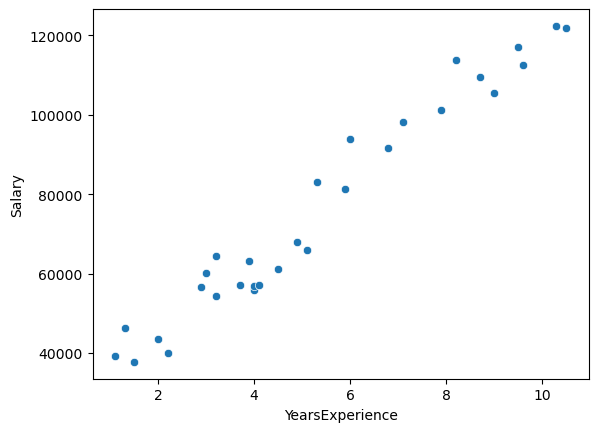

In [6]:
## scatterplot graph for better understanding 
sns.scatterplot(x = 'YearsExperience', y = 'Salary',data = df)

<Axes: xlabel='Salary'>

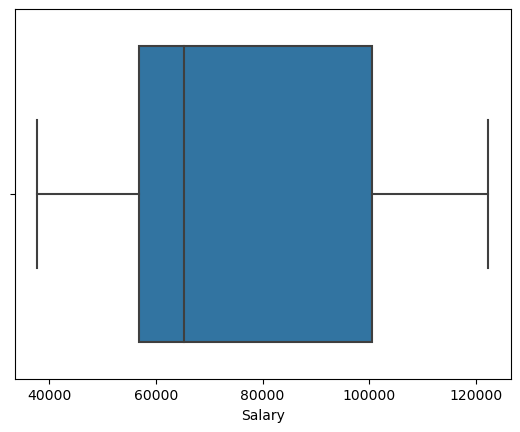

In [5]:
##boxplot graph to check balance of the data
sns.boxplot(x = df['Salary'])

In [86]:
print(df['Salary'].skew())

In [87]:
df.describe()

In [6]:
##sampling the data
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values

In [7]:
##spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=45)

In [97]:
X_train.shape,y_train.shape

((18, 1), (18,))

In [98]:
X_test.shape,y_test.shape

((12, 1), (12,))

In [8]:
#creating the model
model = LinearRegression()
model_train = model.fit(X_train, y_train)

In [9]:
#predicitng the model
y_pred = model.predict(X_test)

In [10]:
##predicting the value
pred = model_train.predict(X_test)
pred

array([ 74578.7257128 , 118595.28892086, 112726.41382645,  53059.51703331,
        64797.26722212,  60884.68382585, 127398.60156247,  55993.95458051,
        62840.97552399,  83382.03835441, 109791.97627925,  54037.66288238])

In [11]:
##creating the columns dataframe
clm =pd.DataFrame(pred, columns = ['Predicted'])
clm

,Predicted
0,74578.725713
1,118595.288921
2,112726.413826
3,53059.517033
4,64797.267222
5,60884.683826
6,127398.601562
7,55993.954581
8,62840.975524
9,83382.038354


In [12]:
#assignning the actual column
clm['Actual'] = y_test

In [13]:
#the dataframe of actual and predicted value
clm

,Predicted,Actual
0,74578.725713,66029.0
1,118595.288921,112635.0
2,112726.413826,105582.0
3,53059.517033,56642.0
4,64797.267222,57081.0
5,60884.683826,57189.0
6,127398.601562,121872.0
7,55993.954581,54445.0
8,62840.975524,63218.0
9,83382.038354,93940.0


In [106]:
square_diff = (y_test - y_pred)**2

In [113]:
##Diagonistics the regression

import numpy as np
MSE = np.mean(square_diff)

print("the value of Mean-Squared-Error is -",MSE)

the value of Mean-Squared-Error is - 35645400.10832912


In [114]:
RMSE = np.sqrt(MSE)
print("the Root of Mean-Squared-Error is -",RMSE)

the Root of Mean-Squared-Error is - 5970.376881598775


In [115]:
absolute_diff = np.abs(y_test - y_pred)
MAE = np.mean(absolute_diff)
print("the Mean-Absolute-Error value is -",MAE)

the Mean-Absolute-Error value is - 5094.393178018872


Text(0, 0.5, 'Salary')

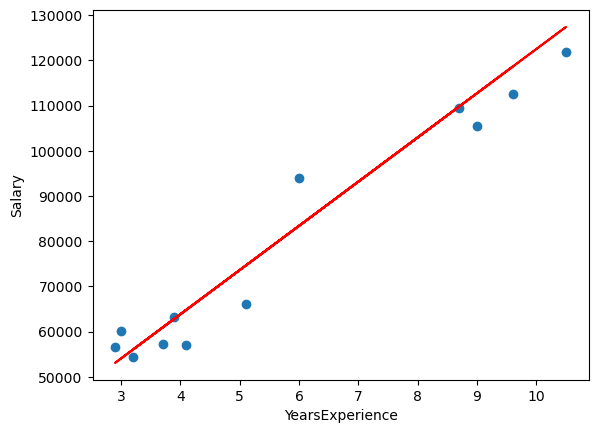

In [14]:
## the regression line on the graph
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color = 'red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [ ]:
#INFERENCE- the regression line finds the best suited points

In [124]:
## Diagonistics of the regression 

sqrt(mean_squared_error(clm['Actual'], clm['Predicted']))

5970.376881598775

In [123]:
## calculating the R Squared value
R2=r2_score(clm['Actual'],clm['Predicted'])
print("the strength of the model is -",R2)

the strength of the model is - 0.9440718382160032


In [126]:
##Saving the model using joblib
import joblib
filename = 'joblib_salary_model.sav'
joblib.dump(model_train,filename)

['joblib_salary_model.sav']